# **Did Average Annual Bike Theft Change Significantly During Jim Chu's Tenure as VPD Chief Constable in Vancouver (2007-2015)?**

### Group 46: Alizah Irfan, Jessie Zhao, Ayaan Ahuja, Mehardeep Singh

# Introduction
In the context of a transition in law enforcement leadership, the impact on crime rates is a topic of great concern. The Vancouver Police Department, a key pillar of law enforcement, was led by three police chiefs from 2003 to 2023 ([Vancouver Police Department](https://vpd.ca/about-the-vpd/executive-team/)). The Chief of Police serves as the highest echelon of the police force. It plays a key role in developing law enforcement strategies, resource allocation, and the overall safety and security of the community (Marquis, 1993). 
### Research Question
Our research sought to understand whether Jim Zhu's appointment as police chief brought about a significant shift in crime dynamics, focusing specifically on the annual bike theft rate. In this investigation, we intend to compare Jim Chu's tenure with that of his predecessor, Jamie Graham, and his successor, Adam Palmer.
### Variables
To address this question, we used statistical inference techniques to analyze the average annual number of bike thefts. We consider the average annual number of bike theft as our location parameter, a variable that provides the core measure of bike theft rates for the period in question. We also study standard deviation as a scaling parameter to measure the variability and distribution of bike theft numbers. We selected the average annual number of bike thefts as the location parameter to encapsulate the central tendency, reflecting the typical impact of bike theft during Chief Constable Jim Chu's tenure, enabling a temporal comparison. The standard deviation serves as the scale parameter, providing insight into the annual fluctuations of theft incidents, which is crucial for assessing the data's consistency and the efficacy of law enforcement strategies over the years.
### Hypotheses
#### For the location parameter (average annual number of bike thefts):
- Null Hypothesis: There is no significant difference in the average annual number of bike thefts during Jim Chu's tenure compared to other periods. $H_0: \mu_{\text{Chu}} = \mu_{\text{other}}$
- Alternative Hypothesis: There is a significant difference in the average annual number of bike thefts during Jim Chu's tenure compared to other periods. $H_A: \mu_{\text{Chu}} \neq \mu_{\text{other}}$

#### For the scale parameter (standard deviation):
- Null Hypothesis: There is no significant difference in the variability of annual bike thefts during Jim Chu's tenure compared to other periods. $H_0: \sigma_{\text{Chu}} = \sigma_{\text{other}}$
- Alternative Hypothesis: There is a significant difference in the variability of annual bike thefts during Jim Chu's tenure compared to other periods. $H_A: \sigma_{\text{Chu}} \neq \sigma_{\text{other}}$

### Dataset Description
Our dataset is derived from the Vancouver Police Department's open data repository and contains crime data from 2003 to 2023 ([Vancouver Police Department (VPD) crime data](https://geodash.vpd.ca/opendata/)). Each row represents a reported crime with different variables including crime type, as well as the neighborhood, date (day, month, year), time, and street location the crime occured. For the purposes of our research, we will examine the crime type and year for each record. We'll group the data by year and calculate the average number of bike thefts per year during each police chief's tenure. We will then determine whether the difference in estimated means is significant.
It is important to recognize that “between 25 to 40 per cent of bike thefts go unreported” (CBC, 2020). Thus, the dataset will represent a sample of all stolen bikes in Vancouver. 

# Preliminary Results
### Loading Packages
Our data analysis commenced with the loading of essential R packages, including `tideverse` and `infer`. These packages provide tools for data cleaning, visualization, and conducting statistical inferences. To ensure accessibility and readability, we also customized the plot dimensions and selected color palettes suitable for individuals with color vision impairments.


In [118]:
library(tidyverse)
library(infer)
library(ggplot2)
library(dplyr)
#install.packages("gridExtra")
library(gridExtra)

### Reading the Data

In [119]:
crimedata <- read.csv('https://raw.githubusercontent.com/alizahirfan/stat201-project/55764f86988a1cd4121c6394cf0d82940ab7f3bf/crimedata.csv', header = TRUE, sep = ",")
head(crimedata)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
1,Break and Enter Commercial,2012,12,14,8,52,,Oakridge,491285.0,5453433
2,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490613.0,5457110
3,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491007.8,5459174
4,Break and Enter Commercial,2021,4,26,4,44,10XX ALBERNI ST,West End,491007.8,5459174
5,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.9,5459166
6,Break and Enter Commercial,2020,7,28,19,12,10XX ALBERNI ST,West End,491015.9,5459166


### Cleaning and Wrangling

The dataset is already in a tidy format. We can add a new column for who was the Chief of Police (Chief Constable) for each year. We can also create individual dataframes for each Chief. 

In [124]:
crimedata_filtered <- crimedata %>% 
  select(TYPE, YEAR) %>%
  filter(TYPE == "Theft of Bicycle") %>%
  mutate(Chief_Constable = case_when(
    YEAR <= 2007 ~ "Jamie Graham",
    YEAR > 2007 & YEAR <= 2015 ~ "Jim Chu",
    YEAR > 2015 ~ "Adam Palmer",
    TRUE ~ "Data Outside Tenures" # for any years outside the specified ranges
  ))
head(crimedata_filtered)

,TYPE,YEAR,Chief_Constable
,<chr>,<int>,<chr>
1,Theft of Bicycle,2005,Jamie Graham
2,Theft of Bicycle,2006,Jamie Graham
3,Theft of Bicycle,2008,Jim Chu
4,Theft of Bicycle,2009,Jim Chu
5,Theft of Bicycle,2011,Jim Chu
6,Theft of Bicycle,2015,Jim Chu


In [125]:
crimedata_palmer <- crimedata_filtered %>%
                    filter(Chief_Constable == "Adam Palmer")
crimedata_chu <- crimedata_filtered %>%
                    filter(Chief_Constable == "Jim Chu")
crimedata_graham <- crimedata_filtered %>%
                    filter(Chief_Constable == "Jamie Graham")

### Visualizing Raw Data

To view the raw data in a way that's helpful for answering our research question, we can plot a bar graph of how many bike thefts have occured every year from 2003 to 2023.

In [126]:
crimedata_summary <- crimedata_filtered %>% 
group_by(YEAR) %>%
summarize(count = n())

In [127]:
data_vis <- crimedata_summary %>%
            ggplot(aes(x = YEAR, y = count, fill = as.factor(YEAR))) +
            geom_bar(stat = "identity", show.legend = FALSE) +
            scale_fill_viridis_d() +
            labs(x = "Year", y = "Number of Bike Thefts", title = "Annual Bike Thefts in Vancouver") +
            theme_minimal()

In [144]:
trend_vis <- crimedata_summary %>%
  ggplot(aes(x = YEAR, y = count)) +
  geom_line(group=1, color="blue") +
  geom_point(color="red") +
  expand_limits(y=0) +
  labs(x = "Year", y = "Number of Bike Thefts", title = "Trend of Annual Bike Thefts in Vancouver") +
  theme_minimal() 

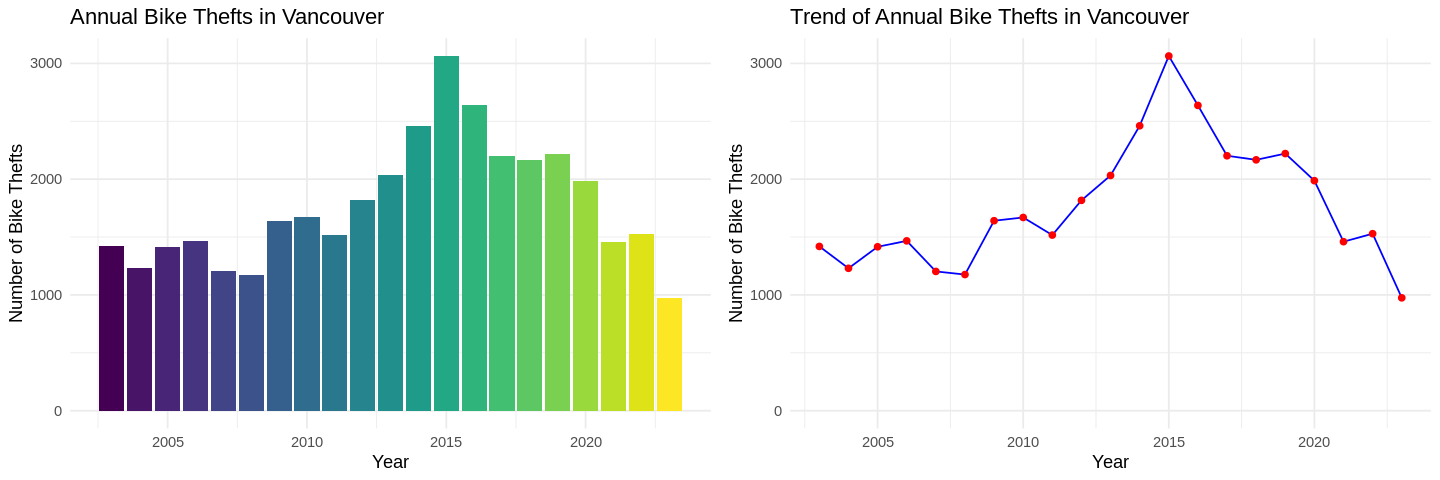

In [162]:
# Display the plots
options(repr.plot.width = 12, repr.plot.height = 4) 
grid.arrange(data_vis, trend_vis, ncol = 2)

### Calculating Statistics for Location parameter and Scale parameter

The statistics we are interested in calculated are mean annual bike thefts and SD of annual bike thefts for each police chief.

In [130]:
# Calculate mean and SD of bike theft for Palmer's tenure
palmer_stats <- crimedata_palmer %>%
  group_by(YEAR) %>%
  summarize(count = n(), .groups = 'drop') %>%
  summarize(mean_theft = mean(count), sd_theft = sd(count), .groups = 'drop') %>%
  mutate(Chief_Constable = "Adam Palmer")

# Calculate mean and SD of bike theft for Chu's tenure
chu_stats <- crimedata_chu %>%
  group_by(YEAR) %>%
  summarize(count = n(), .groups = 'drop') %>%
  summarize(mean_theft = mean(count), sd_theft = sd(count), .groups = 'drop') %>%
  mutate(Chief_Constable = "Jim Chu")

# Calculate mean and SD of bike theft for Graham's tenure
graham_stats <- crimedata_graham %>%
  group_by(YEAR) %>%
  summarize(count = n(), .groups = 'drop') %>%
  summarize(mean_theft = mean(count), sd_theft = sd(count), .groups = 'drop') %>%
  mutate(Chief_Constable = "Jamie Graham")


chiefs_summary <- bind_rows(graham_stats, chu_stats, palmer_stats)

# View the results
chiefs_summary


mean_theft,sd_theft,Chief_Constable
<dbl>,<dbl>,<chr>
1347.000,121.2126,Jamie Graham
1922.125,595.3775,Jim Chu
1897.250,534.9336,Adam Palmer


### Visualizing the Analysis

We will revisit the line graph from earlier with indication of police chief. We can use a bar graph with error bars to view mean annual bike theft and it's associated standard deviation during each police chief's tenure.

In [134]:
# line graph of annual bike theft with indiciation of police chief during that time
time_series_plot <- ggplot(crimedata_summary, aes(x = YEAR, y = count)) +
  geom_line(color = "blue", size = 1) +
  geom_point(color = "red") +
  geom_vline(xintercept = c(2007, 2015), linetype = "dashed", color = "darkgray") +
  geom_text(aes(x = 2002, y = max(count), label = "Graham"), hjust = 0, vjust = 2, color = "darkgray") +
  geom_text(aes(x = 2011, y = max(count), label = "Chu"), hjust = 0, vjust = 2, color = "darkgray") +
  geom_text(aes(x = 2016, y = max(count), label = "Palmer"), hjust = 0, vjust = 2, color = "darkgray") +
  labs(x = "Year", y = "Number of Bike Thefts", title = "Trends in Bike Thefts in Vancouver (2002 - Present)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [135]:
# Creates bar plot with error bars
chiefs_summary_plot <- chiefs_summary %>%
  ggplot(aes(x = Chief_Constable, y = mean_theft, fill = Chief_Constable)) +
  geom_bar(stat = "identity") +
  geom_errorbar(
    aes(ymin = mean_theft - sd_theft, ymax = mean_theft + sd_theft),
    width = 0.2
  ) +
  scale_fill_brewer(palette = "Pastel1") +
  labs(y = "Average Annual Bike Theft", x = "Chief Constable", title = "Bike Theft Statistics by Chief Constable") +
  theme_minimal() +
  theme(legend.position = "none")

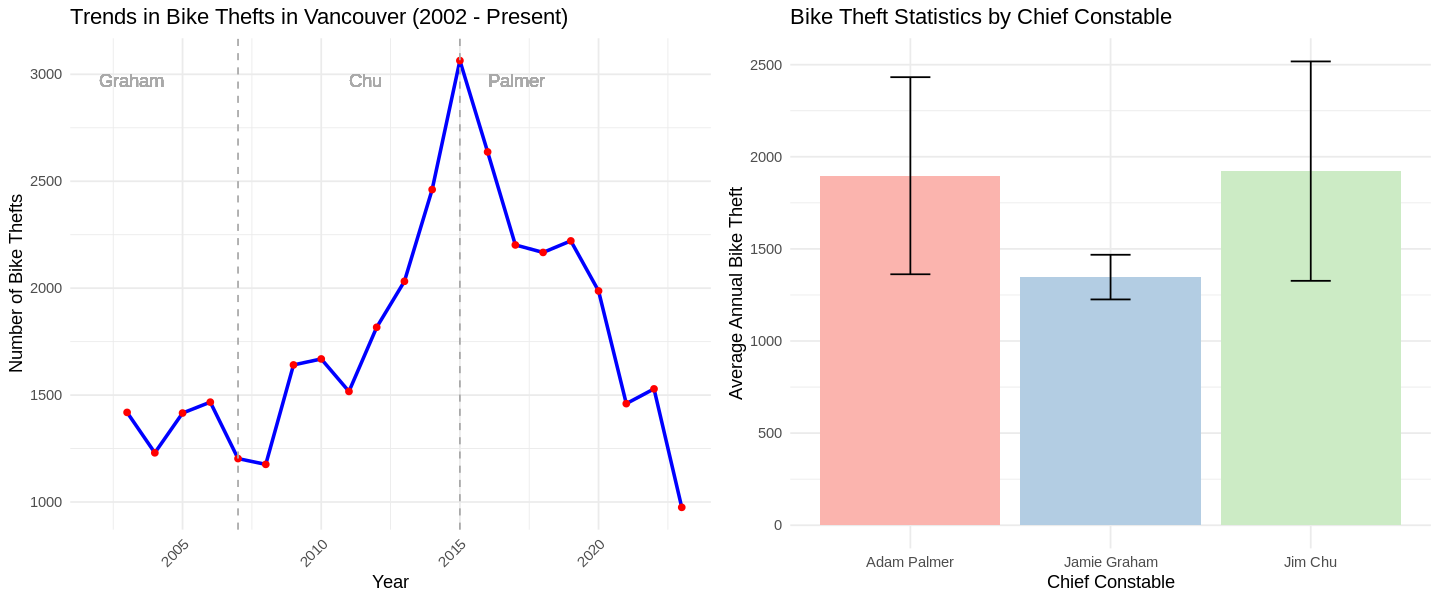

In [166]:
# Display the plots
options(repr.plot.width = 12, repr.plot.height = 5) 
grid.arrange(time_series_plot, chiefs_summary_plot, ncol = 2)

# Methods: Plan

### Trustworthiness of the Report
The strength of this report lies in its meticulous approach to data analysis, anchored in data from authoritative public sources. We've taken great care in preparing the data, aiming to eliminate any potential bias and ensure that our analysis is as accurate as possible. We believe that the use of clear visualizations and straightforward statistical summaries not only makes our findings transparent but also easy to understand and act upon.

### Limitations of Preliminary Analysis
While the preliminary plots and estimates provide an insightful overview of bike theft trends during different Chief Constables' tenures, they are not sufficient for stakeholders who require a more nuanced understanding of the underlying patterns. To this end, our report will supplement these initial findings with a hypothesis test and confidence intervals to assess the statistical significance of the observed differences. Both bootstrapping and asymptotic methods will be utilized to validate the robustness of our results.

### Statistical Analysis Plan
We will conduct hypothesis testing to compare the average annual bike thefts and their variability during Jim Chu's tenure to other periods. The null hypothesis posits no significant difference, while the alternative hypothesis suggests a meaningful change in the average or variability of thefts.

Bootstrapping will be employed to construct confidence intervals and perform hypothesis tests for the location and scale parameters, providing a non-parametric approach to infer the population parameters from our sample. Additionally, we will use asymptotic methods to approximate the sampling distribution of our test statistic under the null hypothesis, enabling us to calculate p-values and assess the evidence against the null hypothesis.

A 95% confidence interval for the mean and standard deviation of bike thefts will be generated to quantify the estimation uncertainty. The significance level will be set at 0.05 for hypothesis testing.

### Expected Outcomes and Impact
We anticipate uncovering whether there was a significant change in the average annual number of bike thefts or their variability during Jim Chu's tenure. A statistically significant finding could indicate the effectiveness (or lack thereof) of the policing strategies implemented in that period.

Such insights could have substantial implications for public safety policies, potentially guiding resource allocation for crime prevention. Moreover, it can inform the public and policymakers about the effectiveness of leadership within the police department.

### Future Directions
Regardless of the outcomes, this analysis could prompt further research into the causal factors contributing to bike thefts and the potential preventive measures. Questions about the socioeconomic determinants of crime, the role of community engagement, and the impact of urban development on crime rates could be explored to build a safer and more informed community.

# Reference:
Crime Statistics. “Crime Statistics.” Vancouver Police Department, 19 July 2023, vpd.ca/crime-statistics/.
Marquis, G. (1993). Policing canada's century: A history of the canadian association of chiefs of police. University of Toronto Press. https://doi.org/10.3138/9781487578480

Vancouver Police Department. “Vancouver Police Chief” Accessed 30 October 2023. https://vpd.ca/about-the-vpd/executive-team/

Global News. "‘I knew right away that that was the bike’: B.C. man helps track down stolen ride on transit bus" Accessed 31 October 2023. https://globalnews.ca/news/7334804/bike-theft-north-vancouver-bus/. Robinson, K. (2020)